# Data Loading and Exploration

## Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Exploration

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:

# loading file
df = pd.read_csv("/content/drive/MyDrive/Refactory Work/ML exam/loan_data [Task 1-3] - loan_data - loan_data [Task 1-3] - loan_data.csv")

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#check how many missing values
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
#checking unique values in categorical columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
for col in cat_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

Unique values in 'Loan_ID':
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250'

# Data Cleaning

In [ ]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Check column names
print(df.columns.tolist())

# Drop Loan_ID if it exists because it is not important to our target
if 'Loan_ID' in df.columns:
    df.drop(columns=['Loan_ID'], inplace=True)

# Fill missing values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Convert '3+' in Dependents to 3
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# Encode categorical columns
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Check the first few rows
df.head()


['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


/tmp/ipython-input-756054764.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
/tmp/ipython-input-756054764.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Choosing features (X) and target (y)


**Target (y)**: The chosen target is the Loan_Status

/tmp/ipython-input-2461144859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='viridis')


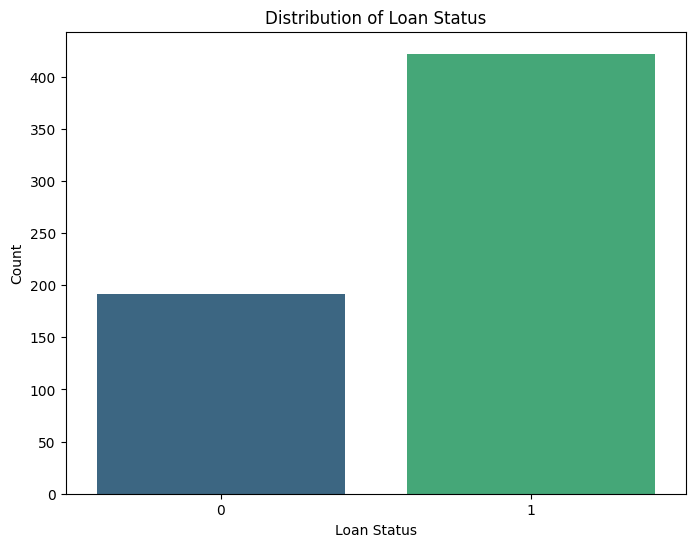

In [ ]:
# Get the count of each unique value in the 'Loan_Status' column
loan_status_counts = df['Loan_Status'].value_counts()

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Loan_Status', palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.savefig('loan_status_distribution.png')
plt.show()

The bar graph shows a class imbalance, with significantly more loans approved than not approved. We will have to be keen to see how the model performs on both classes and find a way to deal with this imbalance.

**Features (X)**

Choosing the features based on their correlation with the target

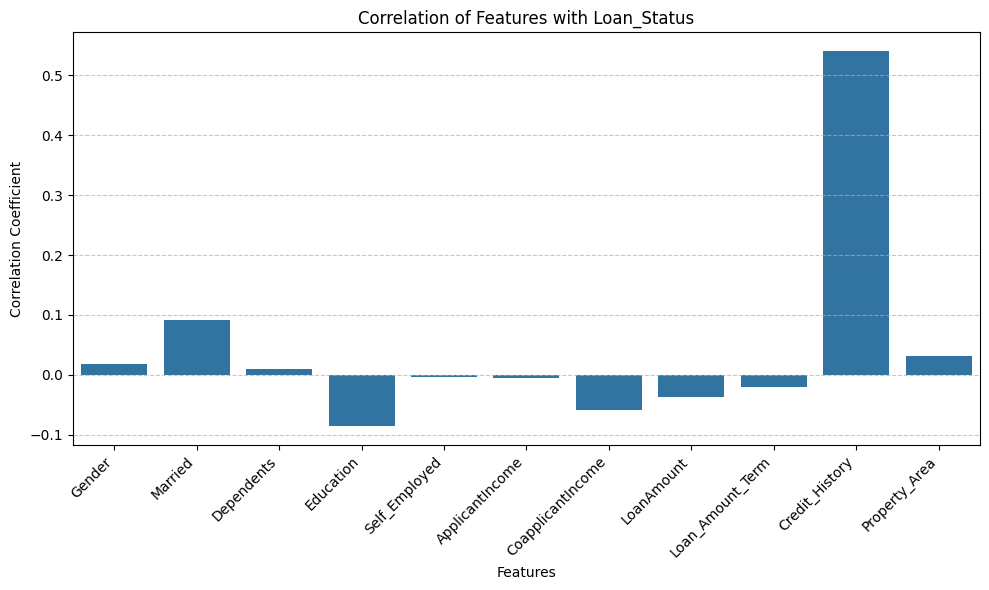


Correlations with Loan_Status:
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64


In [ ]:
# Ensure 'Loan_Status' is at the end for clean plotting
df = df.reindex(columns=[col for col in df.columns if col != 'Loan_Status'] + ['Loan_Status'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlations of all features with the 'Loan_Status' column
correlation_with_target = correlation_matrix['Loan_Status'].drop('Loan_Status')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation of Features with Loan_Status')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\nCorrelations with Loan_Status:")
print(correlation_with_target.sort_values(ascending=False))

## Define features (X) and target (y)

In [ ]:
# Define the target variable (y) as the 'Loan_Status' column
y = df['Loan_Status']

# Define the features (X) by dropping the target column from the DataFrame
X = df.drop('Loan_Status', axis=1)

# Print the shapes of the new datasets to confirm the split
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Print the first few rows of X and y to inspect the split
print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 5 rows of y:")
print(y.head())

Shape of X (features): (614, 11)
Shape of y (target): (614,)

First 5 rows of X:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             5849   
1       1        1           1          0              0             4583   
2       1        1           0          0              1             3000   
3       1        1           0          1              0             2583   
4       1        0           0          0              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  
0              2

**Splitting the data into train and test sets**

In [ ]:
# Split train/test
# Splitting 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (491, 11)
X_test shape: (123, 11)
y_train shape: (491,)
y_test shape: (123,)


## Create the preprocessor
**Numeric columns:**

-Imputer: An imputer will be used for the missing values

-Scaler: Decision trees don’t require scaling, but since we're using a pipeline (and will later switch to models like logistic regression or SVM), it’s good practice to scale the numeric columns within the pipeline.


In [ ]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Task 1 - Decision Trees with Hyper parameter Tuning

## Create and train a default Decision Tree model

--- Default Decision Tree Evaluation ---
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        43
           1       0.76      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.68       123
weighted avg       0.71      0.72      0.71       123



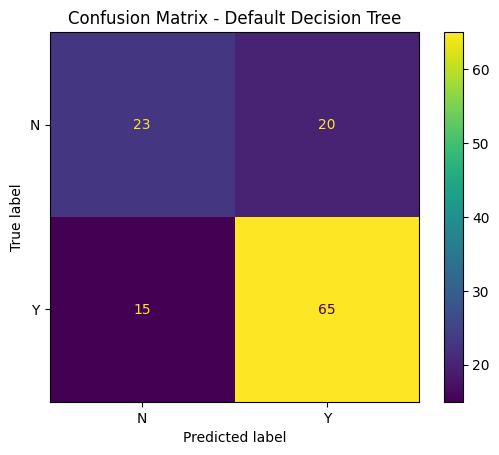

In [ ]:
# Create and train a default Decision Tree model
default_tree = DecisionTreeClassifier(random_state=42)
default_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_default = default_tree.predict(X_test)

# Evaluate the model
print("--- Default Decision Tree Evaluation ---")
print(classification_report(y_test, y_pred_default))

# Create and display the confusion matrix
cm_default = confusion_matrix(y_test, y_pred_default)
ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=['N', 'Y']).plot()
plt.title('Confusion Matrix - Default Decision Tree')
plt.show()

## Decision Tree Classifier (tuned)

Hyperparameters for a decision tree classifier: These are the values you set before training begins.

**max_depth**
This is the maximum number of levels the tree can have. It's one of the most critical hyperparameters for controlling overfitting.

**min_samples_split**
This is the minimum number of data points required to split a node.
in_samples_leaf
This is the minimum number of data points that must exist in a leaf node (the final node in a branch).

**class_weight='balanced'** (During Training)
This hyperparameter directly affects the model's learning process. When you set class_weight='balanced', you are giving the model a training instruction: "Treat samples from the minority class as more important than samples from the majority class."

For your loan data, this tells the model that getting a 'No' prediction wrong is a bigger mistake than getting a 'Yes' prediction wrong. This forces the model to adjust its internal parameters to try and correctly identify the 'No' cases, preventing it from ignoring them.

**GridSearchCV:** This is a powerful technique that automates the process of finding the best hyperparameters. You define a "grid" of different hyperparameter values you want to test, and GridSearchCV systematically trains a model with every combination in that grid. It then reports which combination performed best.

**recall_macro:** This is the key metric you use with GridSearchCV to deal with imbalanced data. Instead of focusing on overall accuracy, recall_macro calculates the recall for each class separately (Yes and No) and then takes the average. This forces GridSearchCV to find the hyperparameter settings that make the model perform well on both the majority and minority classes, preventing it from ignoring the minority class.



Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- GridSearchCV Results ---
Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}

--- Tuned Decision Tree Evaluation ---
              precision    recall  f1-score   support

           0       0.68      0.44      0.54        43
           1       0.75      0.89      0.81        80

    accuracy                           0.73       123
   macro avg       0.71      0.66      0.67       123
weighted avg       0.72      0.73      0.71       123



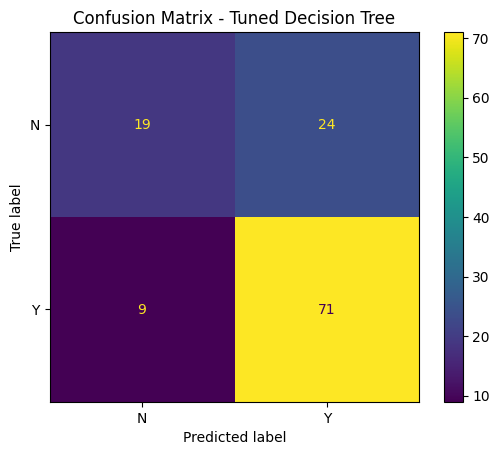

In [ ]:
# Define the hyperparameters to search through
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # Use 5 folds for cross-validation
    scoring='recall_macro', # We want to optimize for recall across all classes
    n_jobs=-1, # Use all available CPU cores
    verbose=1
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and print them
print("\n--- GridSearchCV Results ---")
print("Best hyperparameters found:", grid_search.best_params_)

# Use the best model found by GridSearchCV
tuned_tree = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = tuned_tree.predict(X_test)
print("\n--- Tuned Decision Tree Evaluation ---")
print(classification_report(y_test, y_pred_tuned))

# Create and display the confusion matrix for the tuned model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
ConfusionMatrixDisplay(confusion_matrix=cm_tuned, display_labels=['N', 'Y']).plot()
plt.title('Confusion Matrix - Tuned Decision Tree')
plt.show()

**Visualizing the trees**

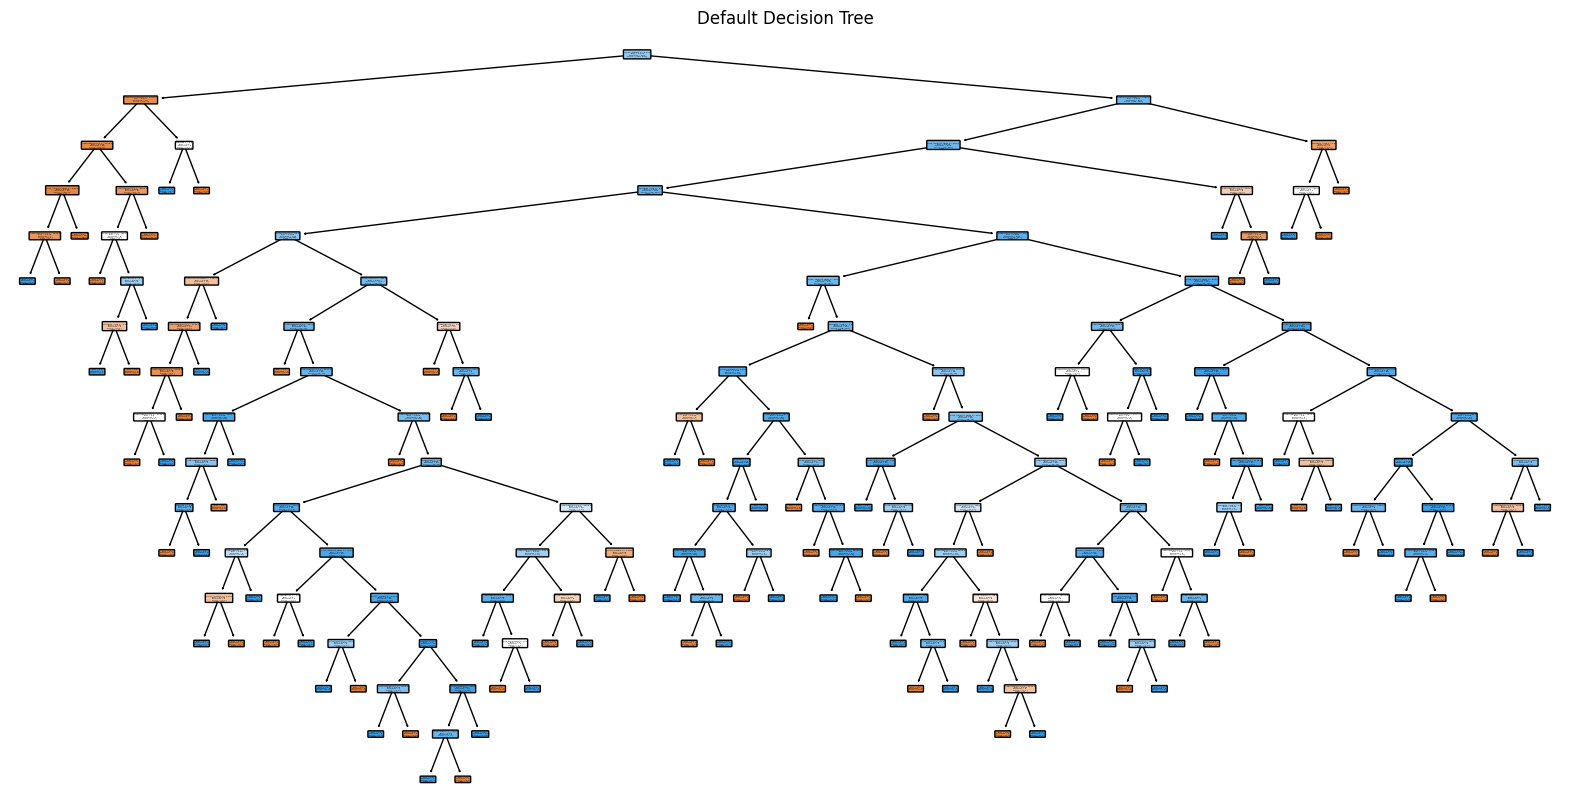

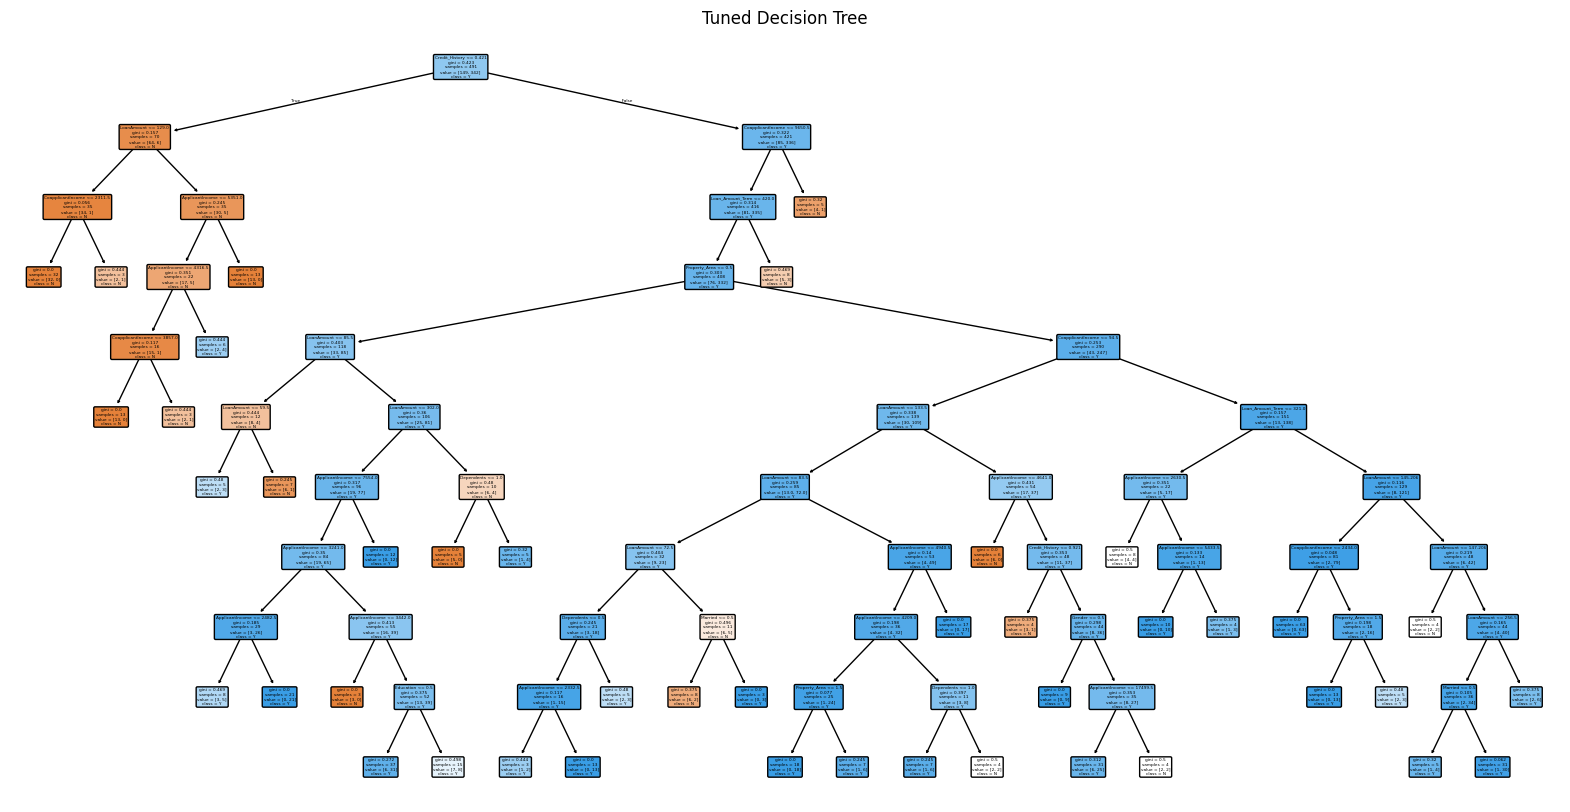

In [ ]:
# Visualize the default decision tree
plt.figure(figsize=(20, 10))
plot_tree(default_tree, feature_names=X.columns, filled=True, rounded=True, class_names=['N', 'Y'])
plt.title("Default Decision Tree")
plt.show()

# Visualize the tuned decision tree
plt.figure(figsize=(20, 10))
plot_tree(tuned_tree, feature_names=X.columns, filled=True, rounded=True, class_names=['N', 'Y'])
plt.title("Tuned Decision Tree")
plt.show()

**Comparing the results from the default and tuned model**

In [ ]:
# Create a dictionary with the data for both models
data = {
    'Model': ['Default', 'Tuned'],
    'recall_macro': [0.67, 0.66],
    'precision (N)': [0.61, 0.68],
    'recall (Y)': [0.81, 0.89]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

     Model  recall_macro  precision (N)  recall (Y)
0  Default          0.67           0.61        0.81
1    Tuned          0.66           0.68        0.89


**Best Hyperparameters:** 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10. The tuned model is much simpler, which helps prevent overfitting.

**Model comparison**

**recall (Y)**: The tuned model performs significantly better, with a recall of 0.89 compared to the default model's 0.81. This means the tuned model correctly identifies more of the actual positive instances.

**precision (N)**: The tuned model also shows better performance here, with a precision of 0.68 versus the default model's 0.61. This indicates that when the tuned model predicts a negative outcome, it is more likely to be correct.

**recall_macro:** The default model has a slightly higher macro average recall of 0.67 compared to the tuned model's 0.66. This suggests the default model has a better balance of recall across both positive and negative classes. The tuned model likely sacrifices recall on the negative class to achieve its high recall on the positive class.

**CONCLUSION:** The tuned model is the better choice. While its overall macro recall is slightly lower, the improvements in these key metrics make it a more powerful and targeted model.

# Task 2 - SVM Algorithm

Support Vector Machine (SVM) is a powerful algorithm that finds the best possible boundary (called a hyperplane) to separate data into different classes.  The goal is to find the hyperplane that has the largest distance to the nearest data point from each class. These nearest points are called support vectors.

**Pros**
Works well with high-dimensional data: SVMs are very effective in spaces with many features, making them suitable for complex tasks like image recognition or text classification.

Effective in high-dimensional spaces: When the number of features is greater than the number of data points, SVMs still perform well.

Memory efficient: The model uses only a subset of the training data (the support vectors) to make its decisions, which saves memory.

Works with non-linear data: SVMs can use a trick called the kernel trick to draw a line in a different, higher-dimensional space. This allows them to separate data that isn't separable with a straight line.

**Cons**
Computationally intensive: Training an SVM can be slow, especially with large datasets, because it has to find the optimal separating line.

Tricky to tune: Choosing the right kernel and other hyperparameters (like the penalty parameter C) can be challenging and requires some trial and error.

Less interpretable: Unlike a Decision Tree, it's hard to understand exactly why an SVM made a specific decision. You can't just look at a simple chart or rules to see how it works.

Poor performance on large datasets: Due to the time-consuming training process, SVMs are not ideal for extremely large datasets.


--- SVM Model ---
              precision    recall  f1-score   support

           0       0.72      0.42      0.53        43
           1       0.74      0.91      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.67       123
weighted avg       0.74      0.74      0.72       123



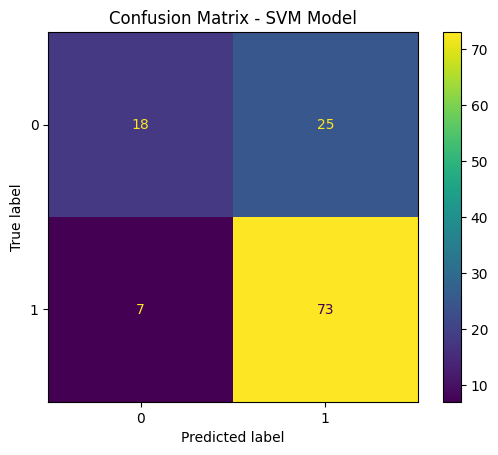

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.svm import SVC

# Create the full pipeline with the SVM classifier
svm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(class_weight='balanced', random_state=42))
])

# Fit the model and make predictions
print("\n--- SVM Model ---")
svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

#Evaluate the model ---
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp.plot()
plt.title('Confusion Matrix - SVM Model')
plt.show()
plt.savefig('confusion_matrix_svm.png')

### **Results and Analysis**
The SVM model is highly effective at identifying positive cases (recall of 0.91), but it struggles to find all the negative cases (recall of 0.42), making it an unbalanced performer with a moderate overall accuracy of 74%.

# Task 3 - Random Forest Classifier

**What it is:**
An ensemble method that builds many decision trees and combines their outputs (majority vote for classification, average for regression) to improve prediction accuracy.

**How it works:**

Bootstrap Sampling : Take random samples from the training set (with replacement).

Random Feature Selection: At each split in a tree, only a random subset of features is considered.

Tree Building: Grow each decision tree fully without pruning.

Aggregation: Combine predictions from all trees.

**Pros**
High accuracy out of the box.

Handles both numerical and categorical data well.

Works well with missing data and unbalanced features.

Resistant to overfitting compared to single decision trees.

Can estimate feature importance.

**Cons**
Less interpretable than a single decision tree.

Can be slow for very large datasets (many trees).

Requires more memory.

Not ideal when real-time predictions are needed (due to multiple trees).



Build the full pipeline with randomForest Classifier

In [ ]:
# Create the full pipeline with the Random Forest classifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

Fit pipeline on training data

In [ ]:
# Fit the model and make predictions
rf_pipeline.fit(X_train, y_train)

#Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

Evaluate model


--- Random Forest Model ---
              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



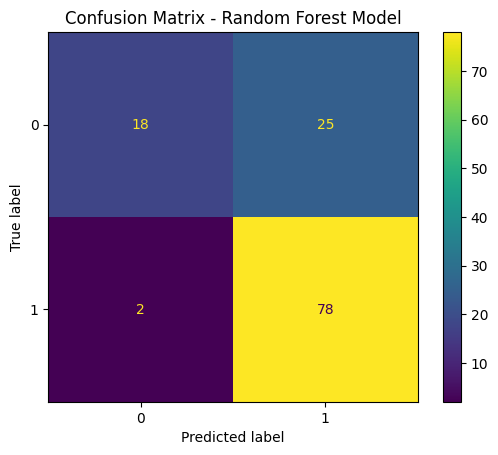

In [ ]:
# --Evaluate the model ---
print("\n--- Random Forest Model ---")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_pipeline.classes_).plot()
plt.title('Confusion Matrix - Random Forest Model')
plt.savefig('confusion_matrix_rf.png')
plt.show()


**Results:**

 The Random Forest model achieved an accuracy of 78%. However, it performs much better at predicting approved loans (1) than not approved loans (0). This is a common result with imbalanced datasets, where the model has more examples of the majority class to learn from.

 The Random Forest model is very good at identifying customers who are eligible for a loan (Y), but it struggles to find all the customers who should be rejected (N). For a company trying to target customers, this model is useful for approving loans with a high degree of confidence. However, if the goal is to identify and avoid risky loans, the model's recall for the N class needs improvement.